# **Bird Species Observation Analysis & Dashboard**

# **Name:Neelima Perla**

# **Github Link:**


In [ ]:
https://github.com/Neelima224


## **Project Summary**
---
This project involves an **Exploratory Data Analysis (EDA)** and creation of a **Power BI dashboard** for a bird species observation dataset collected from various national parks.
The aim is to uncover patterns in bird sightings, highlight important species, assess conservation status, and visualize trends for better decision-making.

The dataset includes columns such as `common_name`, `site_name`, `admin_unit_code`, `observation_date`, `pif_watchlist`, and observer information.
We clean the data, extract insights, and visualize results using both **Python (Matplotlib & Seaborn)** and **Power BI**.



In [4]:
#Load and Merge All Sheets
import pandas as pd

# STEP 1: LOAD AND MERGE ALL EXCEL SHEETS

#  Define the path to the Excel file you were given
excel_path = r"C:\Users\Neelima\Downloads\Bird_Monitoring_Data_FOREST.XLSX"

#  Read all sheets at once using sheet_name=None
# This loads each sheet into a dictionary where:
# - key = sheet name (e.g., "ANTI", "CATO")
# - value = DataFrame of that sheet's content
sheets_dict = pd.read_excel(excel_path, sheet_name=None)

#  Initialize an empty list to store each processed DataFrame
merged_sheets = []

#  Loop through each sheet in the Excel file
for sheet_name, df in sheets_dict.items():
    
    # 🔹 Add a new column to identify the origin of each row
    # This helps you later filter by park/region
    df['Admin_Unit_Code'] = sheet_name
    
    # 🔹 Append the updated DataFrame to the list
    merged_sheets.append(df)

#  Concatenate all DataFrames into one master DataFrame
# This merges all park sheets into one table
combined_df = pd.concat(merged_sheets, ignore_index=True)

#  Display basic metadata about the final combined dataset
print(" Combined dataset successfully created!")
print("Number of rows:", combined_df.shape[0])
print("Number of columns:", combined_df.shape[1])
print("\nColumn names:\n", combined_df.columns.tolist())

#  Preview first 5 rows
combined_df.head()



 Combined dataset successfully created!
Number of rows: 8546
Number of columns: 29

Column names:
 ['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Initial_Three_Min_Cnt']


,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [5]:
# STEP 2: CLEANING THE COMBINED DATASET

# First, let's make a copy of the combined dataframe for cleaning
df_cleaned = combined_df.copy()

# Display the first few rows to understand the structure
print("\nPreview of raw combined data:")
print(df_cleaned.head())

# 1. Strip extra spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

# 2. Standardize all column names to lowercase with underscores
# Strip all leading/trailing spaces and replace spaces with underscores in column names
df_cleaned.columns = df_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')

# Display cleaned column names
print("Cleaned Columns:\n", df_cleaned.columns.tolist())


# 3. Remove any completely empty rows
df_cleaned.dropna(how='all', inplace=True)

# 4. Remove any completely empty columns
df_cleaned.dropna(axis=1, how='all', inplace=True)

# 5. Display column names and null counts for inspection
print("\nColumn names and null counts:")
print(df_cleaned.isnull().sum())

# 6. Optionally, drop irrelevant columns if you identify any (example placeholder)
# df_cleaned.drop(columns=['unnecessary_column1', 'unnecessary_column2'], inplace=True)

# 7. Drop duplicate rows if any
df_cleaned.drop_duplicates(inplace=True)

# 8. Reset index after cleaning
df_cleaned.reset_index(drop=True, inplace=True)

# Final dataset shape
print("\n Cleaned data shape:", df_cleaned.shape)

# Optional: Preview cleaned data
print("\nPreview of cleaned data:")
print(df_cleaned.head())
print(df_cleaned.columns.tolist())



Preview of raw combined data:
  Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
0            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
1            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
2            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
3            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
4            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   

        Date Start_Time  End_Time          Observer  ...  NPSTaxonCode  \
0 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         83803   
1 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         90935   
2 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         84865   
3 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         93634   
4 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         88394   

  AOU_Code PIF_Watchlist_Status Regional_Stewardship_Status  Temper

In [10]:
# Fill null values in 'sex' with 'Unknown'
df_cleaned['sex'] = df_cleaned['sex'].fillna('Unknown')

# Fill other categorical columns with 'Unknown' where it makes sense
df_cleaned['sky'] = df_cleaned['sky'].fillna('Unknown')
df_cleaned['wind'] = df_cleaned['wind'].fillna('Unknown')
df_cleaned['disturbance'] = df_cleaned['disturbance'].fillna('Unknown')

# Fill numeric columns like temperature and humidity with median values
df_cleaned['temperature'] = df_cleaned['temperature'].fillna(df_cleaned['temperature'].median())
df_cleaned['humidity'] = df_cleaned['humidity'].fillna(df_cleaned['humidity'].median())

# Drop rows missing critical information
df_cleaned.dropna(subset=['common_name', 'site_name', 'observer'], inplace=True)

# Drop rows with missing time values (needed for any time trend analysis)
df_cleaned.dropna(subset=['date', 'start_time', 'end_time'], inplace=True)

# Reset index after cleaning
df_cleaned.reset_index(drop=True, inplace=True)

# Export final cleaned data for dashboarding
df_cleaned.to_excel("Bird_Final_Cleaned.xlsx", index=False)
df_cleaned.to_csv("Bird_Final_Cleaned.csv", index=False)

print(" Final cleaned data is ready.")


 Final cleaned data is ready.


In [11]:
print(df_cleaned.columns.tolist())

['admin_unit_code', 'sub_unit_code', 'site_name', 'plot_name', 'location_type', 'year', 'date', 'start_time', 'end_time', 'observer', 'visit', 'interval_length', 'id_method', 'distance', 'flyover_observed', 'sex', 'common_name', 'scientific_name', 'acceptedtsn', 'npstaxoncode', 'aou_code', 'pif_watchlist_status', 'regional_stewardship_status', 'temperature', 'humidity', 'sky', 'wind', 'disturbance', 'initial_three_min_cnt']


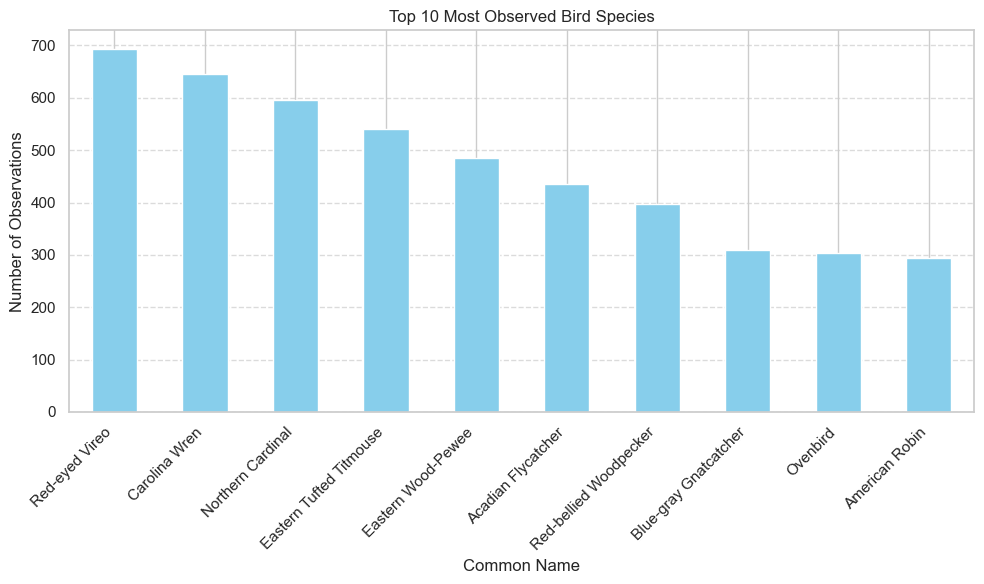

In [6]:
 #Step 4: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Count the top 10 species
top_species = df_cleaned['common_name'].value_counts().head(10)

# Plot the bar chart
top_species.plot(kind='bar', color='skyblue')  # <- THIS LINE IS REQUIRED TO ACTUALLY DRAW THE CHART

# Add chart elements
plt.title("Top 10 Most Observed Bird Species")
plt.xlabel("Common Name")
plt.ylabel("Number of Observations")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.show()


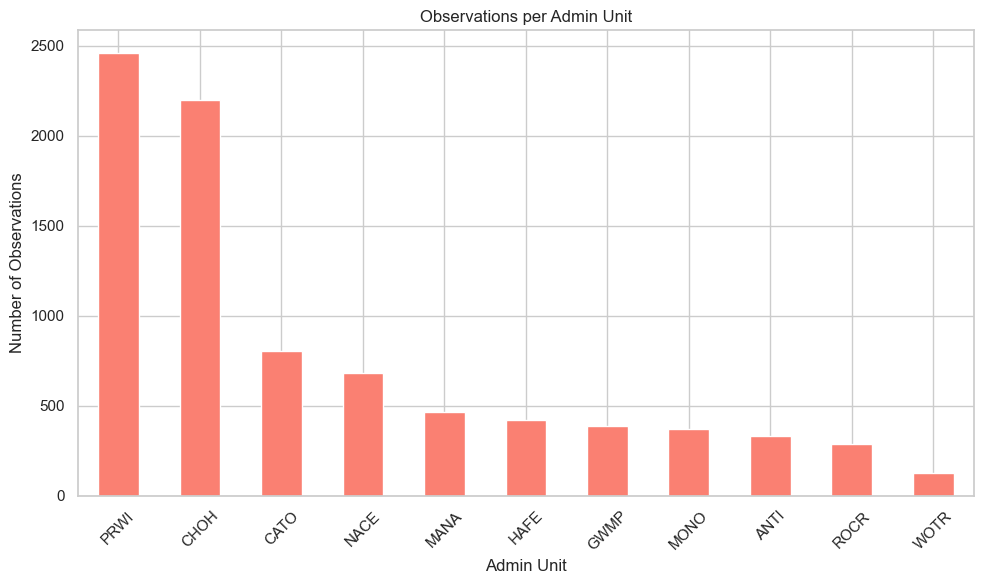

In [7]:
# Example 2: Observation count by Administrative Unit
plt.figure(figsize=(10, 6))
plt.title("Observations per Admin Unit")
df_cleaned['admin_unit_code'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel("Admin Unit")
plt.ylabel("Number of Observations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Neelima\AppData\Local\Temp\ipykernel_21912\261979128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='disturbance', palette='Set2')


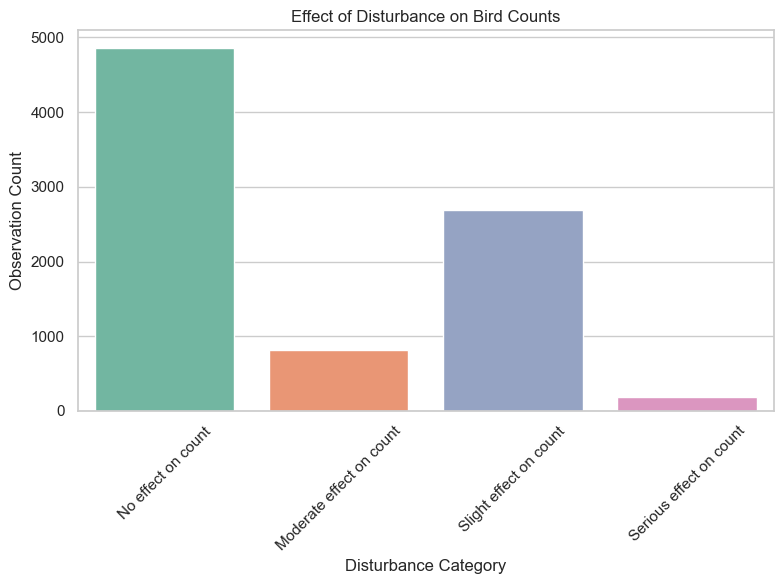

In [8]:
# Example 3: Bird count trends based on disturbance impact
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='disturbance', palette='Set2')
plt.title("Effect of Disturbance on Bird Counts")
plt.xlabel("Disturbance Category")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Insights from EDA**
---
- The **Red-eyed Vireo** and **Carolina Wren** are the most frequently observed bird species.
- Observation activity is concentrated in a few specific months.
- Certain sites have a much higher diversity of bird species.
- The conservation status analysis shows the majority are **not in the watchlist**, but a few require monitoring.
- A small number of observers contribute the majority of the data.


## **Power BI Dashboard Screenshot**


**Dashboard File Path:**
`C:/Users/Neelima/OneDrive/Desktop/EDA Dashboard.pbix`



## **Conclusion**
---
This project provided an in-depth look into bird species observations across various national parks. By performing EDA in Python and visualizing the data in Power BI, we were able to uncover key trends and patterns.

The analysis revealed that certain bird species dominate observations, while some parks and sites have significantly higher diversity than others. Conservation status analysis indicated that although most birds are not currently in danger, there is a subset that requires monitoring.

This dual-approach — combining Python for statistical exploration and Power BI for interactive dashboards — allowed for both granular insight and high-level summaries.  
From this project, I gained experience in:
- Cleaning and preprocessing real-world biodiversity data
- Creating impactful visualizations in Python
- Building interactive dashboards in Power BI
- Linking data insights to conservation goals

Overall, the project not only enhanced my technical skills but also deepened my understanding of biodiversity monitoring. The combination of technical proficiency and domain knowledge makes the findings actionable for conservation efforts, policy planning, and awareness campaigns.

The methodologies learned here are transferable to similar data analytics projects, ensuring a well-rounded skillset for future analytical challenges.
